In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_14252\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the YeoJohnson Autoencoder dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_YeoJohnson_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,89,90,91,92,93,94,95,96,97,priceUSD
0,0,32.837640,3.132764,18.739693,-20.866008,0.372720,-11.044245,16.524812,0.166351,-8.700498,...,1.923946,3.832444,-2.257067,2.835188,-0.372358,-2.096878,-1.698082,-1.425736,-0.033201,0.0495
1,1,32.698404,1.773636,15.820019,-18.043860,5.153551,-13.023228,17.966608,-0.569542,-9.306701,...,1.593726,0.604879,0.335266,1.183815,-0.294895,-1.473127,-0.657472,0.007406,-2.294048,0.0726
2,2,33.090879,0.464927,16.262612,-15.361686,6.718747,-15.603086,16.543319,0.781871,-8.695417,...,0.497217,-0.891250,2.450366,2.249480,-1.947763,-2.079104,1.532892,1.893578,-0.800749,0.0859
3,3,32.781217,1.794096,11.529916,-13.659240,5.869486,-9.849079,17.856147,1.884261,-6.869309,...,-0.687552,-0.829605,-5.461876,0.345240,-0.446096,-0.270433,6.035264,4.706512,-1.654442,0.0783
4,4,32.896643,-0.166702,15.860615,-14.031376,0.153960,-11.811843,16.420547,3.158366,-8.634797,...,-0.422376,1.025973,1.077336,0.491024,0.339590,-0.503155,3.711262,1.314670,-0.031391,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,priceUSD
0,32.837640,3.132764,18.739693,-20.866008,0.372720,-11.044245,16.524812,0.166351,-8.700498,10.438027,...,1.923946,3.832444,-2.257067,2.835188,-0.372358,-2.096878,-1.698082,-1.425736,-0.033201,0.0495
1,32.698404,1.773636,15.820019,-18.043860,5.153551,-13.023228,17.966608,-0.569542,-9.306701,9.018383,...,1.593726,0.604879,0.335266,1.183815,-0.294895,-1.473127,-0.657472,0.007406,-2.294048,0.0726
2,33.090879,0.464927,16.262612,-15.361686,6.718747,-15.603086,16.543319,0.781871,-8.695417,8.221800,...,0.497217,-0.891250,2.450366,2.249480,-1.947763,-2.079104,1.532892,1.893578,-0.800749,0.0859
3,32.781217,1.794096,11.529916,-13.659240,5.869486,-9.849079,17.856147,1.884261,-6.869309,6.376521,...,-0.687552,-0.829605,-5.461876,0.345240,-0.446096,-0.270433,6.035264,4.706512,-1.654442,0.0783
4,32.896643,-0.166702,15.860615,-14.031376,0.153960,-11.811843,16.420547,3.158366,-8.634797,5.447760,...,-0.422376,1.025973,1.077336,0.491024,0.339590,-0.503155,3.711262,1.314670,-0.031391,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,-19.315494,0.236167,-2.750750,-5.370912,-0.186745,4.678685,1.096600,3.019217,2.146403,3.662000,...,-0.429743,1.624900,1.085748,-0.379536,-0.537552,-0.248166,-0.836404,1.001076,0.001219,9349.0000
3484,-19.318940,0.733044,-0.889637,-5.979197,-1.170327,4.752099,-1.059497,4.918116,1.074642,2.816077,...,-0.004836,-0.073998,-0.315707,1.726772,0.086268,-0.590934,-1.087419,0.384172,0.323270,9394.0000
3485,-19.018647,0.730092,-4.161934,-3.696162,2.779836,1.157445,-1.148338,4.904417,-0.041506,3.601954,...,-0.613840,-0.938060,0.686956,2.921627,1.419180,-0.648111,-1.180782,-0.634334,0.133916,9366.0000
3486,-19.091961,-1.767811,0.812909,-4.477929,-1.827579,-0.380548,-2.042414,3.578432,-0.707056,4.743335,...,0.276470,-0.493735,0.480427,1.565258,-0.317555,-1.248186,-0.791837,-0.580324,0.377241,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

### Accuracy on linear regression

In [13]:
train_score = regressor.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = regressor.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 94.14234118490774
Test score of trained model: 94.02823354757119


In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [15]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,858605.503644
1,RMSE,926.609682
2,MAE,670.247982
3,MAPE,24122.446463
4,r2,0.940282
5,adj_r2,0.930512


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 94.14224300146029
Test score of trained model: 94.02074116036616


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [17]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,859682.740160
1,RMSE,927.190779
2,MAE,670.376568
3,r2,0.940207
4,adj_r2,0.930425


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 94.14233880334643
Test score of trained model: 94.02710187901044


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,858768.212092
1,RMSE,926.697476
2,MAE,670.263321
3,r2,0.940271
4,adj_r2,0.930499


### Training the Kernel SVM model on the Training set

In [16]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
pred=grid_GBR.predict(X_test)
train_score = grid_GBR.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = grid_GBR.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.99284958209076
Test score of trained model: 98.90440187824827


In [23]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,157522.331895
1,RMSE,396.890831
2,MAE,204.881696
3,r2,0.989044
4,adj_r2,0.987252


In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9824443667130819

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.2}


### Training the Random forest regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [26]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    k = X_test.shape[1]
    n = len(X_test)

    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

    results = [MSE, RMSE, MAE, r2, adj_r2]
    metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

    table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
    print(table_results)
    return y_test,y_predict

In [27]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9799060617308104
   Metric          Score
0     MSE  288905.571329
1    RMSE     537.499369
2     MAE     237.928568
3      r2       0.979906
4  adj_r2       0.976619
Best Score: 0.9748497282055306
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9804893665065109
   Metric          Score
0     MSE  280518.962530
1    RMSE     529.640409
2     MAE     242.483708
3      r2       0.980489
4  adj_r2       0.977297
Best Score: 0.9746090795136542
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9808225380767001
   Metric          Score
0     MSE  275728.705810
1    RMSE     525.098758
2     MAE     236.723931
3      r2       0.980823
4  adj_r2       0.977685
Best Score: 0.9753531154743568
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9793885903858499
   Metric          Score
0     MSE  296345.643681
1    RMSE     544.376381
2     MAE     242.233838
3      r2       0.979389
4  adj_r2       0.976016
Best Score: 0.9760824962324405
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  4
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9807132411934273
   Metric          Score
0     MSE  277300.148803
1    RMSE     526.592963
2     MAE     233.439198
3      r2       0.980713
4  adj_r2       0.977558
Best Score: 0.9753413716926552
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 1925.0907 - mean_absolute_error: 1916.3882 - val_loss: 1051.0133 - val_mean_absolute_error: 1028.6763
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 555.2269 - mean_absolute_error: 530.3229 - val_loss: 392.2671 - val_mean_absolute_error: 366.8821
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 324.4345 - mean_absolute_error: 298.6511 - val_loss: 316.5970 - val_mean_absolute_error: 290.3983
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 268.1576 - mean_absolute_error: 241.7326 - val_loss: 277.6089 - val_mean_absolute_error: 250.8374
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 231.6049 - mean_absolute_error: 204.5079 - val_loss: 246.8540 - val_mean_absolute_error: 219.2948
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 195.6277 - mean_absolute_error: 167.7855 - val_loss: 225

Epoch 49/100
140/140 [==============================] - 0s 2ms/step - loss: 59.2943 - mean_absolute_error: 38.8326 - val_loss: 114.2298 - val_mean_absolute_error: 93.9946
Epoch 50/100
140/140 [==============================] - 0s 2ms/step - loss: 59.3413 - mean_absolute_error: 39.0467 - val_loss: 105.8211 - val_mean_absolute_error: 85.5814
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 62.0042 - mean_absolute_error: 41.8470 - val_loss: 101.5672 - val_mean_absolute_error: 81.4372
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 56.7756 - mean_absolute_error: 36.7660 - val_loss: 104.1582 - val_mean_absolute_error: 84.3008
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 56.0071 - mean_absolute_error: 36.1503 - val_loss: 106.9575 - val_mean_absolute_error: 87.1069
Epoch 54/100
140/140 [==============================] - 0s 3ms/step - loss: 55.4458 - mean_absolute_error: 35.7074 - val_loss: 102.6028 - val_mea

140/140 [==============================] - 0s 3ms/step - loss: 41.0007 - mean_absolute_error: 26.0171 - val_loss: 91.0001 - val_mean_absolute_error: 76.0867
Epoch 98/100
140/140 [==============================] - 0s 3ms/step - loss: 43.5161 - mean_absolute_error: 28.6076 - val_loss: 95.7349 - val_mean_absolute_error: 80.8534
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 53.9156 - mean_absolute_error: 39.1200 - val_loss: 92.3581 - val_mean_absolute_error: 77.6205
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 42.9828 - mean_absolute_error: 28.2353 - val_loss: 87.0560 - val_mean_absolute_error: 72.3096


In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

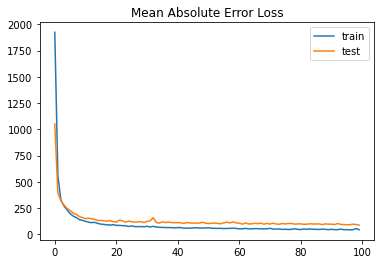

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 2052.3181 - mean_absolute_error: 2047.3967 - val_loss: 1620.7505 - val_mean_absolute_error: 1606.5142
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 674.2803 - mean_absolute_error: 654.1384 - val_loss: 373.9341 - val_mean_absolute_error: 352.1172
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 321.3103 - mean_absolute_error: 299.0652 - val_loss: 310.5586 - val_mean_absolute_error: 287.5480
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 263.5230 - mean_absolute_error: 240.1354 - val_loss: 253.5755 - val_mean_absolute_error: 229.6250
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 199.9262 - mean_absolute_error: 175.5110 - val_loss: 212.0829 - val_mean_absolute_error: 187.1021
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 158.9676 - mean_absolute_error: 133.7665 - val_loss: 207

Epoch 49/100
140/140 [==============================] - 0s 3ms/step - loss: 56.0223 - mean_absolute_error: 36.6624 - val_loss: 96.7076 - val_mean_absolute_error: 77.4496
Epoch 50/100
140/140 [==============================] - 0s 3ms/step - loss: 59.9059 - mean_absolute_error: 40.7335 - val_loss: 101.5792 - val_mean_absolute_error: 82.3932
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 57.9036 - mean_absolute_error: 38.8366 - val_loss: 99.5997 - val_mean_absolute_error: 80.5875
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 53.4538 - mean_absolute_error: 34.5085 - val_loss: 97.1525 - val_mean_absolute_error: 78.2978
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 53.8019 - mean_absolute_error: 34.9942 - val_loss: 88.3924 - val_mean_absolute_error: 69.6603
Epoch 54/100
140/140 [==============================] - 0s 3ms/step - loss: 49.8081 - mean_absolute_error: 31.1027 - val_loss: 97.1820 - val_mean_abs

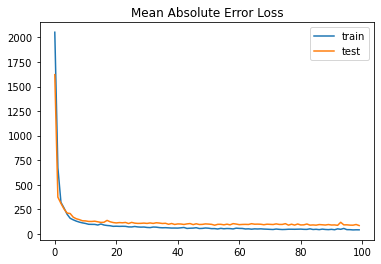

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [16]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [18]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 22.3608 - mse: 15632333.0000 - val_loss: 9.7485 - val_mse: 16731347.0000
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 6.7086 - mse: 14335441.0000 - val_loss: 4.9560 - val_mse: 15038420.0000
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 3.6736 - mse: 12646874.0000 - val_loss: 2.9674 - val_mse: 13067835.0000
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 2.3404 - mse: 10897275.0000 - val_loss: 2.0742 - val_mse: 11166339.0000
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 1.7605 - mse: 9332310.0000 - val_loss: 1.6365 - val_mse: 9691988.0000
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 1.4992 - mse: 8090660.0000 - val_loss: 1.4207 - val_mse: 8606538.0000
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 1.2773 - mse: 7235100.0000 - val_loss: 1.2492 

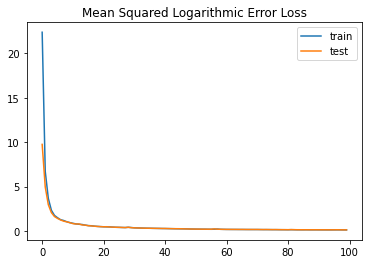

In [19]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [20]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
224/224 [==============================] - 1s 4ms/step - loss: 10315223.0000 - mse: 10315202.0000 - val_loss: 1018902.5000 - val_mse: 1018866.0000
Epoch 2/100
224/224 [==============================] - 1s 3ms/step - loss: 606978.1250 - mse: 606941.0625 - val_loss: 434254.8750 - val_mse: 434216.9688
Epoch 3/100
224/224 [==============================] - 1s 3ms/step - loss: 279046.4375 - mse: 279007.8750 - val_loss: 278811.9688 - val_mse: 278772.7500
Epoch 4/100
224/224 [==============================] - 1s 3ms/step - loss: 180648.0156 - mse: 180608.3594 - val_loss: 238822.2188 - val_mse: 238781.8438
Epoch 5/100
224/224 [==============================] - 1s 3ms/step - loss: 135841.8438 - mse: 135801.2188 - val_loss: 165024.8125 - val_mse: 164983.6719
Epoch 6/100
224/224 [==============================] - 1s 3ms/step - loss: 97792.6172 - mse: 97751.1250 - val_loss: 120234.4688 - val_mse: 120192.5391
Epoch 7/100
224/224 [==============================] - 1s 3ms/step - loss: 718

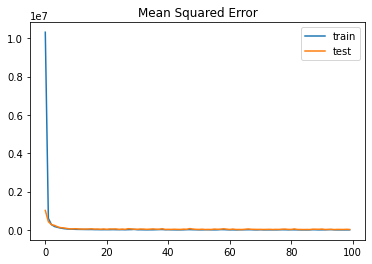

In [23]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()